In [ ]:
#preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mu = np.array([0,0])
Sigma = np.array([[1,0], [0, 1]])
X1, X2 = np.random.multivariate_normal(mu, Sigma, 1000).T
D = np.array([X1, X2]).T

Text(0, 0.5, 'second attribute')

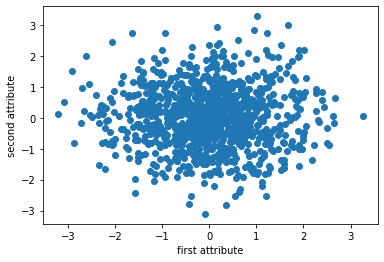

In [ ]:
#Problem 1
#Create a scatter plot of the data,
#with the x-axis corresponding to the first attribute (column) in D
#with the y-axis corresponding to the second attribute (column) in D

plt.scatter(D[:,0], D[:,1])
plt.xlabel("first attribute")
plt.ylabel("second attribute")

In [ ]:
#Problem 2
#a = cos(pi/4) = 1/root2
#b = -sin(pi/4) = -1/root2
#c = sin(pi/4) = 1/root2
#d = cos(pi/4) = 1/root2

import math

a = 1/math.sqrt(2)
b = a * -1
c = a
d = a

R = [[a, b], [c, d]]
S = [[5, 0], [0, 2]]

e = R[0][0] * S[0][0] + R[0][1] * S[1][0]
f = R[0][0] * S[0][1] + R[0][1] * S[1][1]
g = R[1][0] * S[0][0] + R[1][1] * S[1][0]
h = R[1][0] * S[0][1] + R[1][1] * S[1][1]

RS = [[e, f], [g, h]]

def problem2(set1 ,set2):
  DRS = [[0 for i in range(len(D[j]))] for j in range(len(D))]

 #i is the row in the two data sets here

  for i in range(len(set2)):
    DRS[i][0] = set1[0][0] * set2[i][0] + set1[0][1] * set2[i][1]
    DRS[i][1] = set1[1][0] * set2[i][0] + set1[1][1] * set2[i][1]

  return DRS

DRS = problem2(RS, D)

#print("DRS")
#for i in range(len(DRS)):
  #print(DRS[i])

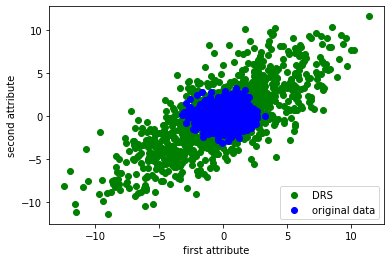

In [ ]:
#Problem 2.a
x = [0 for i in range(len(DRS))]
y = [0 for i in range(len(DRS))]

for i in range(len(DRS)):
  x.append(DRS[i][0])
  y.append(DRS[i][1])

plt.scatter(x, y, color="g")
plt.scatter(D[:,0], D[:,1], color="b")
plt.xlabel("first attribute")
plt.ylabel("second attribute")
plt.legend(["DRS", "original data"], loc ="lower right")
plt.show()

In [ ]:
#Problem 2.b
#write the covariance matrix

def mean(set):
  mean = [0 for i in range(len(set[0]))]
  sum1 = 0
  sum2 = 0

  for i in range(len(set)):
    sum1 += set[i][0]
    sum2 += set[i][1]

  mean[0] = sum1/len(set)
  mean[1] = sum2/len(set)

  return mean

multidimensional_mean_of_DRS = mean(DRS)
#print(multidimensional_mean_of_DRS)

def cov_mat(set, mean):
  covmat = [[0 for i in range(2)] for j in range(2)]
  sum = 0
  n = len(set)
  
  for i in range(len(covmat)):
    for j in range(len(covmat)):
      for k in range(len(set)):
        sum += (set[k][i] - mean[i]) * (set[k][j] - mean[j])

      covmat[i][j] = (1/(n-1)) * sum
      sum = 0

  return covmat

covmat = cov_mat(DRS, multidimensional_mean_of_DRS)

for i in range(len(covmat)):
  print(covmat[i])

[15.140154823150384, 11.35780564178683]
[11.35780564178683, 15.2808932872503]


In [ ]:
#Problem 2.c
#total variance

total_variance = 0

for i in range(len(covmat)):
  for j in range(len(covmat[i])):
    if (i == j):
      total_variance += covmat[i][j]

print(total_variance)

30.421048110400683


In [ ]:
#Problem 3
#Use sklearn's PCA function 
#to transform the data matrix DRS from Question 2 
#to a 2-dimensional space 
#where the coordinate axes are the principal components.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed_DRS = pca.fit_transform(DRS)

(-10.0, 10.0)

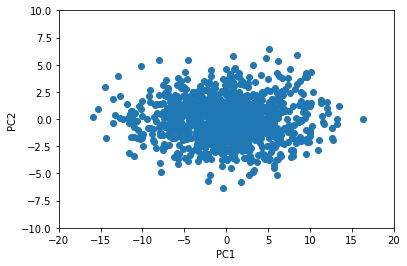

In [ ]:
#Problem 3.a
#x-axis corresponding to the first principal component
#y-axis corresponding to the second principal component

plt.scatter(pca_transformed_DRS[:,0], pca_transformed_DRS[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xlim(-20, 20)
plt.ylim(-10, 10)

In [ ]:
#Problem 3.b
#estimated covariance matrix of the PCA-transformed data

pca_transformed_DRS.shape

def mean(set):
  mean = [0 for i in range(len(set[0]))]
  sum1 = 0
  sum2 = 0

  for i in range(len(set)):
    sum1 += set[i][0]
    sum2 += set[i][1]

  mean[0] = sum1/len(set)
  mean[1] = sum2/len(set)

  return mean

multidimensional_mean_of_PCA_DRS = mean(pca_transformed_DRS)
#print(multidimensional_mean_of_DRS)

def cov_mat(set, mean):
  covmat = [[0 for i in range(2)] for j in range(2)]
  sum = 0
  n = len(set)
  
  for i in range(len(covmat)):
    for j in range(len(covmat)):
      for k in range(len(set)):
        sum += (set[k][i] - mean[i]) * (set[k][j] - mean[j])

      covmat[i][j] = (1/(n-1)) * sum
      sum = 0

  return covmat

covmat_of_PCA = cov_mat(pca_transformed_DRS, multidimensional_mean_of_PCA_DRS)
for i in range(len(covmat_of_PCA)):
  print(covmat_of_PCA[i])

[26.568547687215904, 7.02918982057469e-18]
[7.02918982057469e-18, 3.852500423184777]


In [ ]:
#Problem 3.c

a = pca.explained_variance_ratio_
print("the fraction of total variance captured in the direciton of the 1st principal component is:", a[0])
print("the fraction of total variance captured in the direciton of the 2nd principal component is:", a[1])

the fraction of total variance captured in the direciton of the 1st principal component is: 0.873360693911541
the fraction of total variance captured in the direciton of the 2nd principal component is: 0.12663930608845905


In [ ]:
#Problem 4
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data

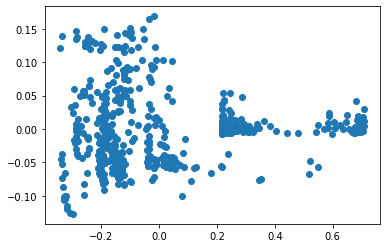

In [ ]:
#Problem 4.a 
#standard normalize the data
#create scatter plot

from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed_normalized_X = pca.fit_transform(normalized_X)
#pca_transformed_normalized_X

plt.scatter(pca_transformed_normalized_X[:,0], pca_transformed_normalized_X[:,1])
plt.show()

range(1, 13)
[0.91063827 0.95519628 0.98224277 0.99582571 0.99721253 0.99851965
 0.99928787 0.99971129 0.99991118 0.9999761  0.99999679 0.9999998 ]


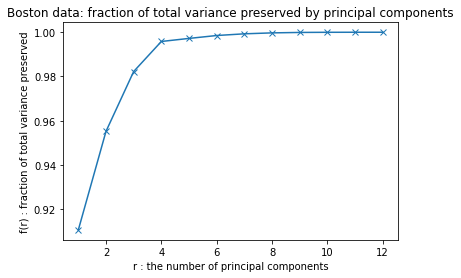

In [ ]:
#Problem 4.b
#create a plot of the fraction of the total variance
#explanined by the first r components
#for r = 1, 2, ... 13
#r is the number of principal components
#we have to show (sum of eigenvalues up to r) / (total of eigenvalue)

pca = PCA(n_components=12)
pca_transformed_normalized_X = pca.fit_transform(normalized_X)

var_ratio = pca.explained_variance_ratio_
plt.plot(range(1,len(var_ratio)+1), np.cumsum(var_ratio), marker='x')
plt.title('Boston data: fraction of total variance preserved by principal components')
plt.xlabel('r : the number of principal components')
plt.ylabel('f(r) : fraction of total variance preserved')

print(range(1,len(var_ratio)+1))
print(np.cumsum(var_ratio))

In [ ]:
#Problem 4.c.i
#If we want to capture at least 90% of the variance of the normalized Bostondata,
#how many principal components (dimensionality) should we use?
print("we can use only one dimensionality to capture 90% of the data.")

we can use only one dimensionality to capture 90% of the data.


In [ ]:
#Problem 4.c.ii
#If we use two principal components of the normalized Boston data,
#how much (what fraction or percentage) of the total variance do we capture?
fraction  = pca.explained_variance_ratio_
percentage = fraction[0] * 100
print("PCA explains", percentage,"% of the normalized data")

PCA explains 91.0638274785804 % of the normalized data


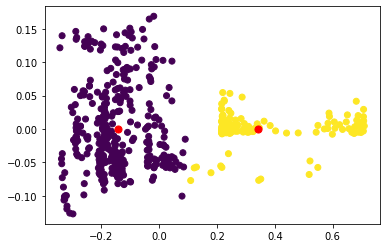

In [ ]:
#Problem 4.d
#find 2 clusters in the two-dimensional, PCA-transformed normalized Boston data set
#Plot the 2-dimensional data with colors corresponding 
#to predicted cluster membership for each point.
#also plot the two means found by the k-means algorithm in a 
#different color than the colors used for the data

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(pca_transformed_normalized_X)
centers = kmeans.cluster_centers_

plt.scatter(pca_transformed_normalized_X[:,0], pca_transformed_normalized_X[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')

6 clusters were found when the epsilon was 0.03 and the minimum samples was 5


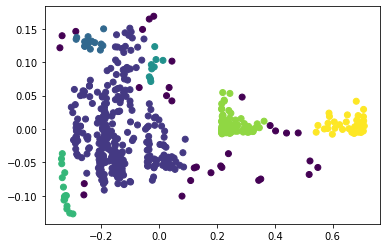

In [ ]:
#Problem 4.e
#DBSCAN to find clusters in the two-dimensional, PCA-transformed normalized Boston data set
#Plot the 2-dimensional data with colors 
#corresponding to predicted cluster membership for each point.
#Noise points should be colored di erently
#How many clusters were found by DBSCAN?

epsilon = 0.03
minimum_samples = 5

from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=epsilon, min_samples=minimum_samples)
pred_labels = dbs.fit_predict(pca_transformed_normalized_X)

plt.scatter(pca_transformed_normalized_X[:,0], pca_transformed_normalized_X[:,1], c=pred_labels)
print("6 clusters were found when the epsilon was", epsilon, "and the minimum samples was", minimum_samples)